# Analysis:
1. Initial outlier analysis
2. Data distribution
3. Feature Engineering: Check for correlation between features, Feature selection using AIC
4. Other interesting findings

In [1]:
from pyspark.sql.functions import to_timestamp, date_format, hour, dayofweek
from pyspark.sql.functions import isnan, when, count, col, split, concat, lit
from pyspark.sql.functions import to_date, create_map
from itertools import chain
from pyspark.sql import SparkSession, Window, functions as F
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName("Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/17 00:21:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/17 00:21:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
sdf = spark.read.parquet("../data/curated/curated_sdf.parquet")

In [4]:
df = pd.read_parquet("../data/curated/sample_data.parquet")

In [10]:
df.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pu_location_id',
       'do_location_id', 'trip_duration', 'pu_dow', 'pu_hour', 'do_dow',
       'do_hour', 'pu_date', 'is_school_holiday', 'temperature', 'dew_point',
       'precipitation', 'wind_direction', 'visibility', 'pressure'],
      dtype='object')

Need to drop negative fare_amount, trip_duration, trip_distance data

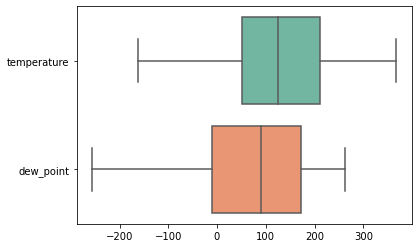

In [8]:
ax = sns.boxplot(data=df[['temperature', 'dew_point']], orient="h", palette="Set2")

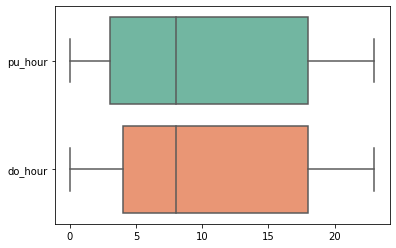

In [11]:
ax = sns.boxplot(data=df[['pu_hour', 'do_hour']], orient="h", palette="Set2")

<AxesSubplot:xlabel='pu_hour'>

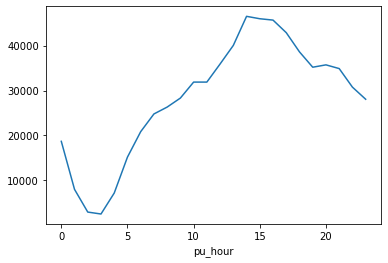

In [5]:
df.groupby(df['pu_hour']).size().plot()
